<a href="https://colab.research.google.com/github/Snehanjaliuppu/AIML-2025/blob/main/adm_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the dataset (adjust the path as needed)
df = pd.read_csv("/content/data.csv", delimiter=';')

# Separate features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 0: Dropout, 1: Enrolled, 2: Graduate

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Model: Logistic Regression
              precision    recall  f1-score   support

     Dropout       0.79      0.77      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885


Model: Random Forest
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.57      0.38      0.45       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885


Model: SVM
              precision    recall  f1-score   support

     Dropout       0.84      0.73      0.78       284
    Enrolled       0.50      0.35      0.41       159
    Graduate 

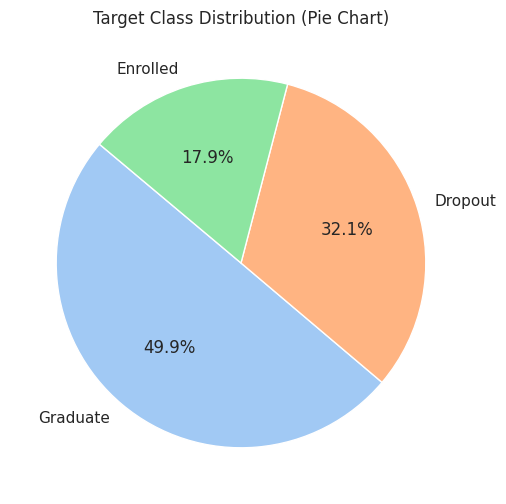

<ipython-input-3-a057bc6a41ef>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")


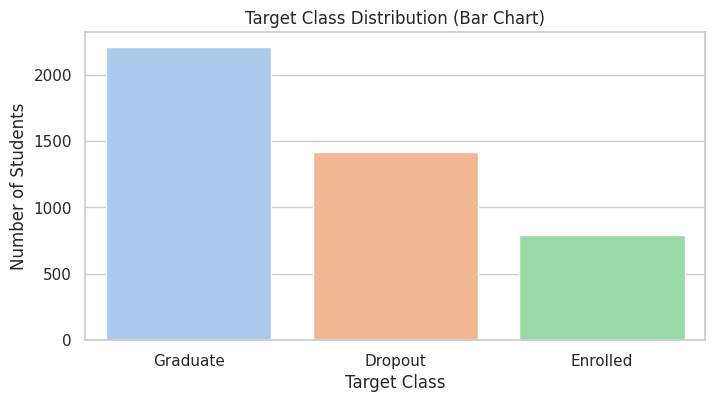

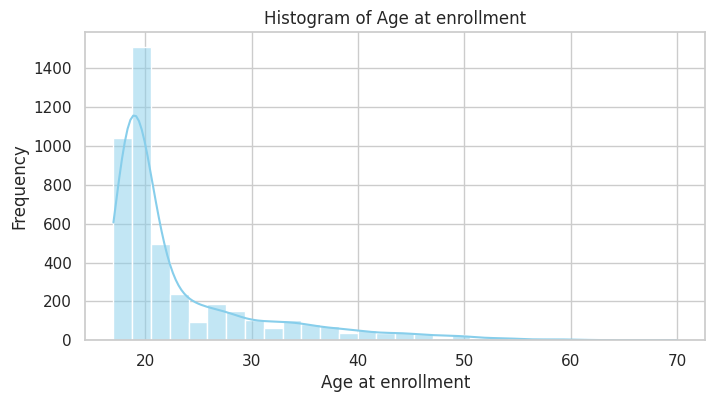

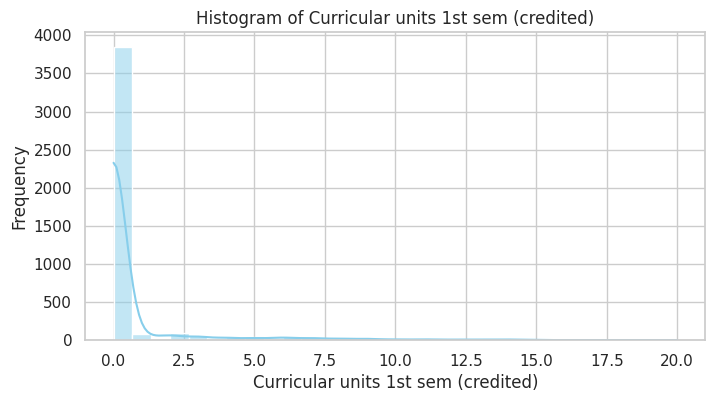

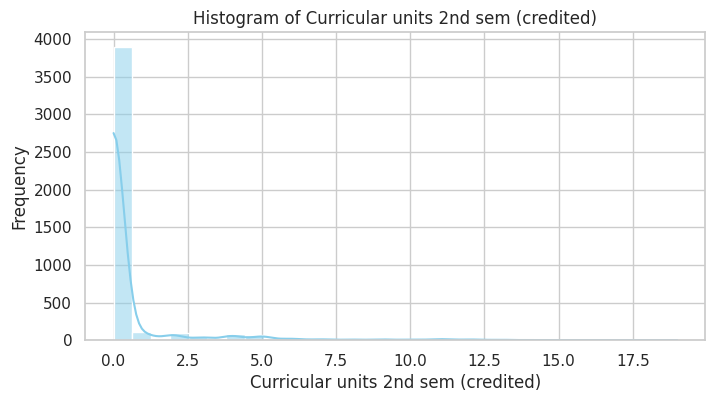

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with proper delimiter
df = pd.read_csv("/content/predict+students+dropout+and+academic+success.zip", delimiter=';')

# Set style for seaborn
sns.set(style="whitegrid")

# -------------------------------------------
# PIE CHART: Target Class Distribution
# -------------------------------------------
class_counts = df["Target"].value_counts()
class_labels = class_counts.index

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Target Class Distribution (Pie Chart)")
plt.show()

# -------------------------------------------
# BAR CHART: Target Class Distribution
# -------------------------------------------
plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="pastel")
plt.title("Target Class Distribution (Bar Chart)")
plt.ylabel("Number of Students")
plt.xlabel("Target Class")
plt.show()

# -------------------------------------------
# HISTOGRAMS: Selected Numeric Features
# -------------------------------------------
selected_columns = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 2nd sem (credited)'
]

for col in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
